## Mall Customers Clustering

Malls or shopping complexes are often indulged in the race to increase their customers and hence making huge profits. To achieve this task machine learning is being applied by many stores already. It is amazing to realize the fact that how machine learning can aid in such ambitions. The shopping complexes make use of their customers’ data and develop ML models to target the right ones. This not only increases sales but also makes the complexes efficient.

## Import Standard Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Import My Dataset

In [2]:
df=pd.read_csv('C:/Users/INDIA/Downloads/Mall_Customers.csv')

In [3]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### The dataset contains the following informtion
1. CustomerID: It is the unique ID given to a customer
2. Gender: Gender of the customer
3. Age: The age of the customer
4. Annual Income(k$): It is the annual income of the customer
5. Spending Score: It is the score(out of 100) given to a customer by the mall authorities, based on the money spent and the behavior of the customer.



### Check for missing values

In [4]:
df.isna().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:
df.shape

(200, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


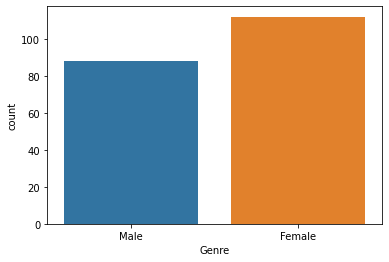

In [8]:
sns.countplot(x='Genre',data=df)
plt.show()

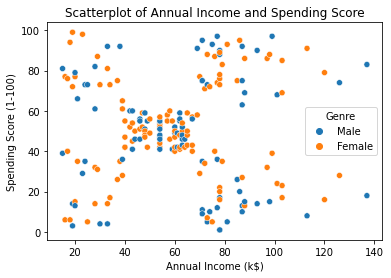

In [9]:
# Visualise a scatterplot

sns.scatterplot(x='Annual Income (k$)',
                y='Spending Score (1-100)',
                data=df,
                hue='Genre')

plt.title("Scatterplot of Annual Income and Spending Score")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()

## Machine Learning workflow

### 1. Extract Features

In [10]:
x=df[['Annual Income (k$)','Spending Score (1-100)']]

In [11]:
x.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [12]:
## 1.1 Features should not have null values

x.isna().sum()

Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [13]:
## 1.2 Features should be numeric

x.dtypes

Annual Income (k$)        int64
Spending Score (1-100)    int64
dtype: object

In [14]:
## 1.3 Features should be the type of array/dataframe

type(x)

pandas.core.frame.DataFrame

In [15]:
## 1.4 Features should have some rows and columns

x.shape

(200, 2)

In [16]:
## 1.5 Features should be on the same scale

x.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
scaler=StandardScaler()

In [19]:
x=scaler.fit_transform(x)

##  Train the model on the training dataset

In [20]:
from sklearn.cluster import KMeans

For choosing the optimum number of clusters, an elbow curve is used as below.

In [21]:
ssd=[]

for i in range(2,11):
    model=KMeans(n_clusters=i)
    model.fit(x)
    ssd.append(model.inertia_)

In [22]:
ssd

[269.2993428689869,
 157.70400815035939,
 108.92131661364358,
 65.56840815571681,
 55.11422576528422,
 44.86475569922555,
 37.24595372674167,
 32.33704843502525,
 29.076176851244288]

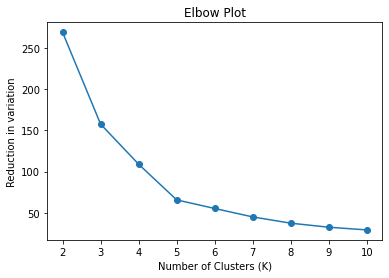

In [23]:
plt.plot(range(2,11),ssd,marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Reduction in variation')
plt.title('Elbow Plot')
plt.show()

* This is called an "elbow plot", and you can pick 'K' by finding the 'elbow' in the plot
* There is a huge reduction in the variation with k=5, but after that, the variation doesn't go down as quickly

### Take a Appropriate cluster and build a K-Means Cluster

In [24]:
## Set number of clusters

model=KMeans(n_clusters=5,random_state=42)

In [25]:
## Fit the input data

model.fit(x)

KMeans(n_clusters=5, random_state=42)

In [26]:
centroids=model.cluster_centers_
centroids

array([[-1.32954532,  1.13217788],
       [-0.20091257, -0.02645617],
       [ 1.05500302, -1.28443907],
       [-1.30751869, -1.13696536],
       [ 0.99158305,  1.23950275]])

In [27]:
model.labels_

array([3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 2, 4, 1, 4, 2, 4, 2, 4,
       1, 4, 2, 4, 2, 4, 2, 4, 2, 4, 1, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4])

## Predictions 

In [28]:
predictions=pd.DataFrame(model.predict(x))

In [29]:
predictions

,0
0,3
1,0
2,3
3,0
4,3
...,...
195,4
196,2
197,4
198,2


In [30]:
predictions=pd.DataFrame(model.predict(x),columns=['ClusterId'])

In [31]:
predictions

,ClusterId
0,3
1,0
2,3
3,0
4,3
...,...
195,4
196,2
197,4
198,2


In [32]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [33]:
final=pd.concat([predictions,df],axis=1)

In [34]:
final.head()

,ClusterId,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,3,1,Male,19,15,39
1,0,2,Male,21,15,81
2,3,3,Female,20,16,6
3,0,4,Female,23,16,77
4,3,5,Female,31,17,40


In [35]:
final[final['ClusterId']==0]

,ClusterId,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
1,0,2,Male,21,15,81
3,0,4,Female,23,16,77
5,0,6,Female,22,17,76
7,0,8,Female,23,18,94
9,0,10,Female,30,19,72
11,0,12,Female,35,19,99
13,0,14,Female,24,20,77
15,0,16,Male,22,20,79
17,0,18,Male,20,21,66
19,0,20,Female,35,23,98


In [36]:
final[final['ClusterId']==0].Genre.value_counts()

Female    13
Male       9
Name: Genre, dtype: int64

In [37]:
final[final['ClusterId']==1].Genre.value_counts()

Female    48
Male      33
Name: Genre, dtype: int64

In [38]:
final[final['ClusterId']==2].Genre.value_counts()

Male      19
Female    16
Name: Genre, dtype: int64

In [39]:
final[final['ClusterId']==3].Genre.value_counts()

Female    14
Male       9
Name: Genre, dtype: int64

In [40]:
final[final['ClusterId']==4].Genre.value_counts()

Female    21
Male      18
Name: Genre, dtype: int64

# Visualizations

In [41]:
final

,ClusterId,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,3,1,Male,19,15,39
1,0,2,Male,21,15,81
2,3,3,Female,20,16,6
3,0,4,Female,23,16,77
4,3,5,Female,31,17,40
...,...,...,...,...,...,...
195,4,196,Female,35,120,79
196,2,197,Female,45,126,28
197,4,198,Male,32,126,74
198,2,199,Male,32,137,18


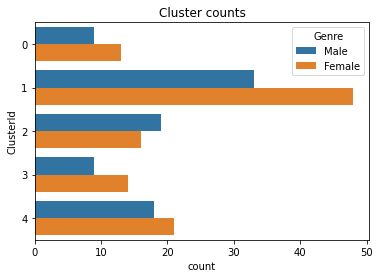

In [42]:
# Bar Chart of ClusterId counts

sns.countplot(y='ClusterId', hue='Genre', data=final)
plt.title("Cluster counts")
plt.show()

Key points:
* ClusterId 1 has the most counts with 81 customers
* ClusterId 0 and ClusterId 3 has the smallest number of counts with 23 and 22 respectively
* Female customers dominates all ClusterId's except for ClusterId 2, where there is a higher male composition 

In [43]:
from collections import Counter
from itertools import chain

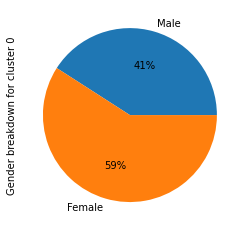

In [44]:
cts = Counter(chain.from_iterable(df.loc[final['ClusterId'] == 0].Genre.str.split('|').values))
_ = plt.pie(cts.values(), labels=cts.keys(), autopct='%1.0f%%')
_ = plt.ylabel('Gender breakdown for cluster 0')

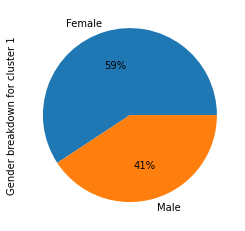

In [45]:
cts = Counter(chain.from_iterable(df.loc[final['ClusterId'] == 1].Genre.str.split('|').values))
_ = plt.pie(cts.values(), labels=cts.keys(), autopct='%1.0f%%')
_ = plt.ylabel('Gender breakdown for cluster 1')

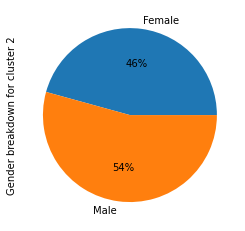

In [46]:
cts = Counter(chain.from_iterable(df.loc[final['ClusterId'] == 2].Genre.str.split('|').values))
_ = plt.pie(cts.values(), labels=cts.keys(), autopct='%1.0f%%')
_ = plt.ylabel('Gender breakdown for cluster 2')

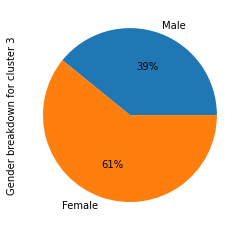

In [47]:
cts = Counter(chain.from_iterable(df.loc[final['ClusterId'] == 3].Genre.str.split('|').values))
_ = plt.pie(cts.values(), labels=cts.keys(), autopct='%1.0f%%')
_ = plt.ylabel('Gender breakdown for cluster 3')

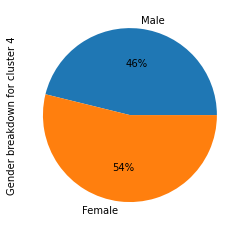

In [48]:
cts = Counter(chain.from_iterable(df.loc[final['ClusterId'] == 4].Genre.str.split('|').values))
_ = plt.pie(cts.values(), labels=cts.keys(), autopct='%1.0f%%')
_ = plt.ylabel('Gender breakdown for cluster 4')

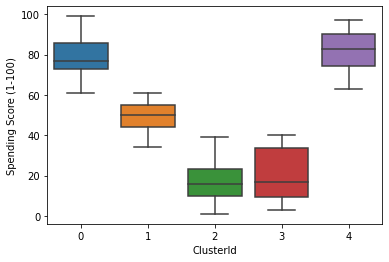

In [49]:
sns.boxplot(x='ClusterId',
            y="Spending Score (1-100)",
            data=final)
plt.show()

In terms of spending score:
* ClusterID 0 and ClusterID 4 has the highest spending score
* ClusterID 4 has a slightly higher mean of 82 compared to 79 for ClusterID 0
* ClusterID 2 and ClusterID 3 shows the lowest spending score with mean of 17 and 21 respectively

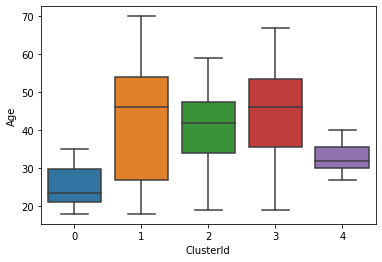

In [50]:
sns.boxplot(x='ClusterId',
            y="Age",
            data=final)
plt.show()

In terms of age range:
* ClusterID 4 has a narrow age range of between 27 to 40 with a mean of 32
* ClusterID 0 is the youngest category with age between 18 to 35 and a mean of 25
* ClusterID 1 has the widest age range of between 18 to 70 and with mean of 41

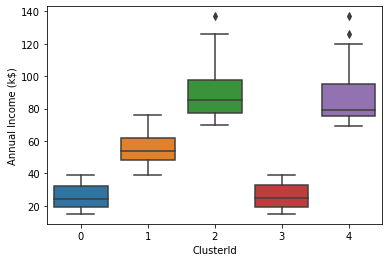

In [51]:
sns.boxplot(x='ClusterId',
            y="Annual Income (k$)",
            data=final)
plt.show()

In terms of annual income:
* ClusterID 2 has the highest annual income with mean 88k
* ClusterID 0 has the lowest annual income with mean 25k

## Summary Statistics For Each Cluster

In [52]:
## Cluster: 0

final.loc[final['ClusterId'] == 0].describe()

,ClusterId,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,22.0,22.000000,22.000000,22.000000,22.000000
mean,0.0,23.090909,25.272727,25.727273,79.363636
std,0.0,13.147185,5.257030,7.566731,10.504174
min,0.0,2.000000,18.000000,15.000000,61.000000
25%,0.0,12.500000,21.250000,19.250000,73.000000
50%,0.0,23.000000,23.500000,24.500000,77.000000
75%,0.0,33.500000,29.750000,32.250000,85.750000
max,0.0,46.000000,35.000000,39.000000,99.000000


In [53]:
### Cluster: 1

final.loc[final['ClusterId'] == 1].describe()

,ClusterId,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,81.0,81.000000,81.000000,81.000000,81.000000
mean,1.0,86.320988,42.716049,55.296296,49.518519
std,0.0,24.240889,16.447822,8.988109,6.530909
min,1.0,44.000000,18.000000,39.000000,34.000000
25%,1.0,66.000000,27.000000,48.000000,44.000000
50%,1.0,86.000000,46.000000,54.000000,50.000000
75%,1.0,106.000000,54.000000,62.000000,55.000000
max,1.0,143.000000,70.000000,76.000000,61.000000


In [54]:
### Cluster: 2

final.loc[final['ClusterId'] == 2].describe()

,ClusterId,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,35.0,35.000000,35.000000,35.000000,35.000000
mean,2.0,164.371429,41.114286,88.200000,17.114286
std,0.0,21.457325,11.341676,16.399067,9.952154
min,2.0,125.000000,19.000000,70.000000,1.000000
25%,2.0,148.000000,34.000000,77.500000,10.000000
50%,2.0,165.000000,42.000000,85.000000,16.000000
75%,2.0,182.000000,47.500000,97.500000,23.500000
max,2.0,199.000000,59.000000,137.000000,39.000000


In [55]:
### Cluster: 3

final.loc[final['ClusterId'] == 3].describe()

,ClusterId,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,23.0,23.00000,23.000000,23.000000,23.000000
mean,3.0,23.00000,45.217391,26.304348,20.913043
std,0.0,13.56466,13.228607,7.893811,13.017167
min,3.0,1.00000,19.000000,15.000000,3.000000
25%,3.0,12.00000,35.500000,19.500000,9.500000
50%,3.0,23.00000,46.000000,25.000000,17.000000
75%,3.0,34.00000,53.500000,33.000000,33.500000
max,3.0,45.00000,67.000000,39.000000,40.000000


In [56]:
### Cluster: 4

final.loc[final['ClusterId'] == 4].describe()

,ClusterId,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,39.0,39.000000,39.000000,39.000000,39.000000
mean,4.0,162.000000,32.692308,86.538462,82.128205
std,0.0,22.803509,3.728650,16.312485,9.364489
min,4.0,124.000000,27.000000,69.000000,63.000000
25%,4.0,143.000000,30.000000,75.500000,74.500000
50%,4.0,162.000000,32.000000,79.000000,83.000000
75%,4.0,181.000000,35.500000,95.000000,90.000000
max,4.0,200.000000,40.000000,137.000000,97.000000


## Conclusion

Using K-means clustering the mall customers in the dataset can be grouped into 5 different ClusterId's based on their spending score and annual income.


### The characteristics of each ClusterId can be summarised as follows.

### ClusterId 0
* Smallest Cluster in terms of count with females being the majority
* Second highest average spending score with 79 out of 100
* This is despite having the lowest average annual income when compared to the other ClusterId's
* Youngest Cluster Group with average age of 25

### ClusterId 1
* Largest Cluster Group comprising 81 customers
* Moderate level of spending with average spending score of 50 out of 100
* Middle income category with average of 55k
* Covers all age range from 18 to 70

### ClusterId 2
* Comprise of majority male customers (54%)
* Tend to spend less with lowest average spending score of 17 out of 100
* This is despite having the highest average income compared to the other ClusterId's
* Age range for this Group varies but has a higher concentration in between mid 30s to mid 40s

### ClusterId 3
* Second smallest ClusterId comprising 23 customers
* Second lowest average spending score of 21 out of 100
* Low average income ClusterId
* Covers all age group from 19 to 67 years old

### ClusterId 4
* Second largest ClusterId comprising 39 customers with female majority
* Highest average spending score of 82 out of 100
* Second highest average annual income compared to the other ClusterId's
* Age group concentrated in early 30s
